<a href="https://colab.research.google.com/github/Gr8eye/Total_Pop_Fert_Data/blob/master/Birth_DataWhiteboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Question
----------------------

## **Are birth and fertility rates on a continuous decline despite the continuous rise of population?**


# [Data](https://population.un.org/wpp/Download/Standard/CSV/):
------------

From the United Nations World Population Prospects Data there are six datasets available:

* **Total Population**: Total population annually from 1950-2100
   * PopMale: Total male population (thousands)
   * PopFemale: Total female population (thousands)
   * PopTotal: Total population, both sexes (thousands)
   * PopDensity: Population per square kilometre (thousands)

* **Population By Age and Sex**: Population by sex in 5 year age groups
    * PopMale: Male population in the age group (thousands)
    * PopFemale: Female population in the age group (thousands)
    * PopTotal: Total population in the age group (thousands)

* **Population By Age and Sex**: Population by single age and single year
    * PopMale: Male population for the individual age (thousands)
    * PopFemale: Female population for the individual age (thousands)
    * PopTotal: Total population for the individual age (thousands)
* **Fertility Indicators**: Fertility indicators, by age, annualy and 5-year periods, from 1950-1955 to 2095-2100
    * ASFR: Age-specific fertility rate (births per 1,000 women)
    * PASFR: Percentage age-specific fertility rate
    * Births: Number of births, both sexes combined (thousands)
* **Period Indicators**: Several indicators in 5-year periods, from 1950-1955 to 2095-2100
    * TFR: Total fertility (live births per woman)
    * NRR *: Net reproduction rate (surviving daughters per woman)
    * CBR: Crude birth rate (births per 1,000 population)
    * Births: Number of births, both sexes combined (thousands)
    * LEx: Life expectancy at birth for both sexes combined (years)
    * LExMale: Male life expectancy at birth (years)
    * LExFemale: Female life expectancy at birth (years)
    * IMR: Infant mortality rate, q(1), for both sexes combined (infant deaths per 1,000 live births)
    * Q5: Under-five mortality, 5q0, for both sexes combined (deaths under age five per 1,000 live births)
    * CDR: Crude death rate (deaths per 1,000 population)
    * Deaths: Number of deaths, both sexes combined (thousands)
    * DeathsMale *: Number of male deaths (thousands)
    * DeathsFemale *: Number of female deaths (thousands)
    * CNMR *: Net migration rate (per 1,000 population)
    * NetMigrations *: Net number of migrants, both sexes combined (thousands)
    * GrowthRate: Average annual rate of population change (percentage)
    * NatIncr: Rate of natural increase (per 1,000 population)
    * SRB *: Sex ratio at birth (male births per female births)
    * MAC: Female mean age of childbearing (years)
* **Life Table**: Abridged life tables up to age 100 by sex and both sexes combined providing a set of values showing the mortality experience of a hypothetical group of infants born at the same time and subject throughout their lifetime to the specific mortality rates of a given period, from 1950-1955 to 2095-2100
    * mx: Central death rate, nmx, for the age interval (x, x+n)
    * qx: Probability of dying (nqx), for an individual between age x and x+n
    * px: Probability of surviving, (npx), for an individual of age x to age x+n
    * lx: Number of survivors, (lx), at age (x) for 100000 births
    * dx: Number of deaths, (ndx), between ages x and x+n
    * Lx: Number of person-years lived, (nLx), between ages x and x+n
    * Sx: Survival ratio (nSx) corresponding to proportion of the life table population in age group (x, x+n) who are alive n year later
    * Tx: Person-years lived, (Tx), above age x
    * ex: Expectation of life (ex) at age x, i.e., average number of years lived subsequent to age x by those reaching age x
    * ax: Average number of years lived (nax) between ages x and x+n by those dying in the interval

-----------

I knew I wouldn't need to use all of these to reach my conclusion but I checked 
each one out to see if there was any data I could use in my abridged dataset.

In [1]:
#Imports used
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
TP = pd.read_csv('https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv')
print(TP.shape)
TP.sample()

(280932, 10)


,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
169924,508,Mozambique,7,Zero migration,2034,2034.5,22388.893,23326.374,45715.267,58.134


In [3]:
PS5 = pd.read_csv('https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_PopulationByAgeSex_Medium.csv')
print(PS5.shape)
PS5.sample()

(1404753, 12)


,LocID,Location,VarID,Variant,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
200984,921,Central and Southern Asia,2,Medium,2007,2007.5,70-74,70,5,11180.164,12014.884,23195.048


In [4]:
PS1 = pd.read_csv('https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_PopulationBySingleAgeSex_1950-2019.csv')
print(PS1.shape)
PS1.sample()

(3132010, 12)


,LocID,Location,VarID,Variant,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
592370,1638,Countries with Access to the Sea,2,Medium,2005,2005.5,5,5,1,57465.742,53492.589,110958.331


In [5]:
FI = pd.read_csv('https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_Fertility_by_Age.csv')
print(FI.shape)
FI.sample()

(458486, 12)


,LocID,Location,VarID,Variant,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,ASFR,PASFR,Births
78030,156,China,204,Lower 80 PI,2035-2040,2038,20-24,20,5,38.917,15.398,NaN


In [6]:
PI = pd.read_csv('https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_Period_Indicators_Medium.csv')
print(PI.shape)
PI.sample()

(14940, 25)


,LocID,Location,VarID,Variant,Time,MidPeriod,TFR,NRR,CBR,Births,LEx,LExMale,LExFemale,IMR,Q5,CDR,Deaths,DeathsMale,DeathsFemale,CNMR,NetMigrations,GrowthRate,NatIncr,SRB,MAC
5030,222,El Salvador,2,Medium,2050-2055,2053,1.669,0.804,10.847,374.713,79.66,75.97,83.01,5.408,6.359,9.09,314.03,151.145,162.885,-3.365,-116.252,-0.161,1.757,1.05,27.725


In [7]:
LT = pd.read_csv('https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_Life_Table_Medium.csv')
print(LT.shape)
LT.sample()

(877140, 21)


,LocID,Location,VarID,Variant,Time,MidPeriod,SexID,Sex,AgeGrp,AgeGrpStart,AgeGrpSpan,mx,qx,px,lx,dx,Lx,Sx,Tx,ex,ax
241612,1056,ESCAP: SAARC,2,Medium,1950-1955,1953,2,Female,80-84,80,5,0.16635,0.572438,0.427562,5748.967,3290.925,19783.164,0.38046,29875.666,5.1967,2.276854


# **Data Cleaning and Structuring**:

## Choosing Datasets

### Period Indicator:

1. Rename columns for better understanding
2. Trim to dates I would actually be using
3. Removing Variant and VarID columns

In [8]:
# The most useful dataset for what I needed was in the Period Indicator
# I chose to start there
print(PI.shape)
PI.head(3).append(PI.tail(2))

(14940, 25)


,LocID,Location,VarID,Variant,Time,MidPeriod,TFR,NRR,CBR,Births,LEx,LExMale,LExFemale,IMR,Q5,CDR,Deaths,DeathsMale,DeathsFemale,CNMR,NetMigrations,GrowthRate,NatIncr,SRB,MAC
0,4,Afghanistan,2,Medium,1950-1955,1953,7.450,1.636,50.314,2015.476,28.61,27.94,29.43,275.866,405.090,36.862,1476.605,794.020,682.585,-0.499,-20.0,1.296,13.452,1.060,29.835
1,4,Afghanistan,2,Medium,1955-1960,1958,7.450,1.765,50.998,2201.589,31.13,30.43,31.97,253.647,374.138,33.718,1455.605,783.110,672.495,-0.463,-20.0,1.683,17.280,1.060,29.835
2,4,Afghanistan,2,Medium,1960-1965,1963,7.450,1.899,51.477,2439.130,33.74,32.99,34.64,230.194,341.957,30.808,1459.784,777.437,682.347,-0.422,-20.0,2.026,20.669,1.060,29.835
14938,716,Zimbabwe,2,Medium,2090-2095,2093,1.831,0.883,12.492,1926.925,74.00,71.19,76.82,12.274,15.751,11.191,1726.185,899.147,827.038,-0.324,-50.0,0.098,1.301,1.021,30.201
14939,716,Zimbabwe,2,Medium,2095-2100,2098,1.816,0.876,12.194,1886.759,74.66,71.84,77.48,11.863,15.140,11.611,1796.481,927.691,868.790,-0.323,-50.0,0.026,0.583,1.021,30.307


In [9]:
# Exchange Column Names
PI.rename(columns={ 'Time':'Time Period',
                                     'TFR':'Total Fertility',
                                     'NRR': 'NRR(surviving daughters)',
                                     'CBR':'Crude Birth Rate',
                                     'LEx':'Life Expectancy(birth)',
                                     'IMR':'Infant Mortality Rate',
                                     'Q5':'Under-five Mortality',
                                     'CDR':'Crude Death Rate',
                                     'CNMR':'Net Migration Rate(pK)',
                                     'NetMigrations':'Net Migrants(K)',
                                     'NatIncr':'Natural Increase Rate',
                                     'SRB': 'Sex ratio(m per f births',
                                     'MAC': 'Mean Age Childbearing(f)',
                                     'PopTotal':'Total Population',
                                     'PopDensity':'Population per square k(density)'}
                            ,inplace=True)

In [10]:
# I decided I would need the furthest projected date
PIP = PI.drop(PI[PI['MidPeriod'] < 2098].index)
PIP

,LocID,Location,VarID,Variant,Time Period,MidPeriod,Total Fertility,NRR(surviving daughters),Crude Birth Rate,Births,Life Expectancy(birth),LExMale,LExFemale,Infant Mortality Rate,Under-five Mortality,Crude Death Rate,Deaths,DeathsMale,DeathsFemale,Net Migration Rate(pK),Net Migrants(K),GrowthRate,Natural Increase Rate,Sex ratio(m per f births,Mean Age Childbearing(f)
29,4,Afghanistan,2,Medium,2095-2100,2098,1.720,0.819,10.201,3848.645,78.25,76.31,80.21,10.163,12.133,12.126,4574.867,2353.104,2221.763,-0.822,-310.076,-0.275,-1.925,1.060,30.001
59,903,Africa,2,Medium,2095-2100,2098,2.141,1.019,14.925,314608.513,76.23,73.94,78.58,13.310,17.965,8.727,183952.870,96744.623,87208.247,-0.094,-1981.301,0.610,6.198,1.040,29.799
89,1823,African Group,2,Medium,2095-2100,2098,2.141,1.019,14.929,314458.037,76.22,73.93,78.57,13.315,17.972,8.726,183797.916,96665.086,87132.830,-0.095,-2006.070,0.611,6.203,1.040,29.799
119,1560,African Union,2,Medium,2095-2100,2098,2.141,1.019,14.927,314530.016,76.22,73.94,78.57,13.313,17.969,8.726,183867.105,96700.491,87166.614,-0.094,-1978.160,0.611,6.201,1.040,29.799
149,2080,African Union: Central Africa,2,Medium,2095-2100,2098,2.122,1.005,15.371,46041.618,73.32,70.71,76.01,19.964,26.090,8.920,26717.512,14298.257,12419.255,-0.036,-106.998,0.642,6.451,1.030,29.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14819,1801,World Bank Regional Groups (developing only),2,Medium,2095-2100,2098,1.955,0.930,11.883,567736.023,80.61,78.73,82.59,9.559,12.643,11.142,532364.287,275495.815,256868.472,-0.260,-12437.861,0.048,0.741,1.050,30.094
14849,1802,World Bank income groups,2,Medium,2095-2100,2098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14879,887,Yemen,2,Medium,2095-2100,2098,1.673,0.800,10.361,2775.884,75.84,73.46,78.27,10.666,12.953,13.067,3500.896,1808.964,1691.932,-0.373,-100.000,-0.308,-2.706,1.050,30.366
14909,894,Zambia,2,Medium,2095-2100,2098,2.351,1.135,16.930,6737.253,77.59,74.64,80.52,9.315,11.957,7.031,2797.973,1481.555,1316.418,-0.063,-25.000,0.984,9.899,1.031,29.681


In [11]:
# And then dropped the years I wouldn't need from the set to trim it down
PI1 = PI.drop(PI[PI['MidPeriod'] > 2025].index)
PI1

,LocID,Location,VarID,Variant,Time Period,MidPeriod,Total Fertility,NRR(surviving daughters),Crude Birth Rate,Births,Life Expectancy(birth),LExMale,LExFemale,Infant Mortality Rate,Under-five Mortality,Crude Death Rate,Deaths,DeathsMale,DeathsFemale,Net Migration Rate(pK),Net Migrants(K),GrowthRate,Natural Increase Rate,Sex ratio(m per f births,Mean Age Childbearing(f)
0,4,Afghanistan,2,Medium,1950-1955,1953,7.450,1.636,50.314,2015.476,28.61,27.94,29.43,275.866,405.090,36.862,1476.605,794.020,682.585,-0.499,-20.000,1.296,13.452,1.060,29.835
1,4,Afghanistan,2,Medium,1955-1960,1958,7.450,1.765,50.998,2201.589,31.13,30.43,31.97,253.647,374.138,33.718,1455.605,783.110,672.495,-0.463,-20.000,1.683,17.280,1.060,29.835
2,4,Afghanistan,2,Medium,1960-1965,1963,7.450,1.899,51.477,2439.130,33.74,32.99,34.64,230.194,341.957,30.808,1459.784,777.437,682.347,-0.422,-20.000,2.026,20.669,1.060,29.835
3,4,Afghanistan,2,Medium,1965-1970,1968,7.450,2.017,51.646,2728.221,36.15,35.37,37.06,211.072,314.708,28.223,1490.896,790.745,700.151,-0.379,-20.000,2.307,23.423,1.060,29.835
4,4,Afghanistan,2,Medium,1970-1975,1973,7.450,2.141,51.234,3056.451,38.74,37.92,39.67,191.642,286.630,25.495,1520.938,802.414,718.524,-0.335,-20.000,2.544,25.739,1.060,29.835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14920,716,Zimbabwe,2,Medium,2000-2005,2003,3.720,1.425,32.395,1940.337,43.73,41.96,45.62,65.008,99.861,17.485,1047.301,540.010,507.291,-11.651,-697.817,0.326,14.910,1.021,28.166
14921,716,Zimbabwe,2,Medium,2005-2010,2008,3.885,1.512,35.220,2181.357,45.02,43.34,46.68,62.686,96.286,16.915,1047.650,521.294,526.356,-8.278,-512.676,1.003,18.305,1.020,27.877
14922,716,Zimbabwe,2,Medium,2010-2015,2013,4.090,1.761,36.445,2415.589,56.71,54.88,58.26,51.221,70.933,10.194,675.684,323.126,352.558,-9.399,-622.997,1.686,26.251,1.020,27.960
14923,716,Zimbabwe,2,Medium,2015-2020,2018,3.626,1.620,30.845,2211.423,60.83,59.16,62.22,38.740,51.246,8.074,578.844,273.627,305.217,-8.150,-584.288,1.463,22.771,1.020,28.203


In [12]:
# putting the two frames together and sorting them so that they're how I want them
PI2 = pd.concat([PI1,PIP]).sort_index()

In [13]:
# Didn't need Variant and Variant ID so I dropped them 
PI2.drop('Variant', axis=1,inplace=True)
PI2.drop('VarID', axis=1,inplace=True)

#### Final Check:

1. Rename columns for better understanding
  * Columns renamed
2. Trim to dates I would actually be using
  * Cropped to 1953 - 2023, 2098
3. Removing Variant and VarID columns
  * Columns dropped

In [14]:
PI2 = PI2.reset_index().drop(['index'],1)
PI2

,LocID,Location,Time Period,MidPeriod,Total Fertility,NRR(surviving daughters),Crude Birth Rate,Births,Life Expectancy(birth),LExMale,LExFemale,Infant Mortality Rate,Under-five Mortality,Crude Death Rate,Deaths,DeathsMale,DeathsFemale,Net Migration Rate(pK),Net Migrants(K),GrowthRate,Natural Increase Rate,Sex ratio(m per f births,Mean Age Childbearing(f)
0,4,Afghanistan,1950-1955,1953,7.450,1.636,50.314,2015.476,28.61,27.94,29.43,275.866,405.090,36.862,1476.605,794.020,682.585,-0.499,-20.000,1.296,13.452,1.060,29.835
1,4,Afghanistan,1955-1960,1958,7.450,1.765,50.998,2201.589,31.13,30.43,31.97,253.647,374.138,33.718,1455.605,783.110,672.495,-0.463,-20.000,1.683,17.280,1.060,29.835
2,4,Afghanistan,1960-1965,1963,7.450,1.899,51.477,2439.130,33.74,32.99,34.64,230.194,341.957,30.808,1459.784,777.437,682.347,-0.422,-20.000,2.026,20.669,1.060,29.835
3,4,Afghanistan,1965-1970,1968,7.450,2.017,51.646,2728.221,36.15,35.37,37.06,211.072,314.708,28.223,1490.896,790.745,700.151,-0.379,-20.000,2.307,23.423,1.060,29.835
4,4,Afghanistan,1970-1975,1973,7.450,2.141,51.234,3056.451,38.74,37.92,39.67,191.642,286.630,25.495,1520.938,802.414,718.524,-0.335,-20.000,2.544,25.739,1.060,29.835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7963,716,Zimbabwe,2005-2010,2008,3.885,1.512,35.220,2181.357,45.02,43.34,46.68,62.686,96.286,16.915,1047.650,521.294,526.356,-8.278,-512.676,1.003,18.305,1.020,27.877
7964,716,Zimbabwe,2010-2015,2013,4.090,1.761,36.445,2415.589,56.71,54.88,58.26,51.221,70.933,10.194,675.684,323.126,352.558,-9.399,-622.997,1.686,26.251,1.020,27.960
7965,716,Zimbabwe,2015-2020,2018,3.626,1.620,30.845,2211.423,60.83,59.16,62.22,38.740,51.246,8.074,578.844,273.627,305.217,-8.150,-584.288,1.463,22.771,1.020,28.203
7966,716,Zimbabwe,2020-2025,2023,3.322,1.501,27.689,2144.053,62.16,60.39,63.66,34.096,45.112,7.619,589.959,281.010,308.949,-3.959,-306.540,1.612,20.070,1.022,28.367


### Total Population:
 Looking at the data I knew there'd be a lot of washing and rearranging for this one
1. This set includes all variants while the PI dataframe only contains 'Medium'
2. The Times needed to be trimmed to the years I am analyzing
3. There is no Time period but single years
4. I would only be using 'PopTotal' and 'PopDensity' (I opted to include female and male population as well)

In [15]:
TP

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486
...,...,...,...,...,...,...,...,...,...,...
280927,716,Zimbabwe,207,Lower 95 PI,2080,2080.5,10576.533,11255.983,21836.893,56.448
280928,716,Zimbabwe,207,Lower 95 PI,2085,2085.5,10293.349,11050.875,21355.988,55.205
280929,716,Zimbabwe,207,Lower 95 PI,2090,2090.5,9920.336,10767.709,20689.956,53.483
280930,716,Zimbabwe,207,Lower 95 PI,2095,2095.5,9503.711,10412.184,19892.080,51.421


In [16]:
# Trimmed to Medium Variant
TP1 = TP[TP.Variant == 'Medium']
TP1

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486
...,...,...,...,...,...,...,...,...,...,...
280194,716,Zimbabwe,2,Medium,2096,2096.5,15008.463,15932.316,30940.779,79.981
280195,716,Zimbabwe,2,Medium,2097,2097.5,15008.822,15943.386,30952.208,80.011
280196,716,Zimbabwe,2,Medium,2098,2098.5,15007.570,15952.241,30959.811,80.031
280197,716,Zimbabwe,2,Medium,2099,2099.5,15004.963,15959.089,30964.052,80.041


In [17]:
# Trimming the time to what I'll use
TP2 = TP1.drop(TP1[TP1['MidPeriod'] > 2026].index)
TP2

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486
...,...,...,...,...,...,...,...,...,...,...
280119,716,Zimbabwe,2,Medium,2021,2021.5,7205.231,7886.940,15092.171,39.013
280120,716,Zimbabwe,2,Medium,2022,2022.5,7322.449,8008.977,15331.426,39.631
280121,716,Zimbabwe,2,Medium,2023,2023.5,7444.481,8136.542,15581.023,40.277
280122,716,Zimbabwe,2,Medium,2024,2024.5,7572.222,8268.580,15840.802,40.948


In [18]:
# Filter out columns I may need 
TP3 = TP2.filter(['LocID','Location','Time','PopFemale','PopMale','PopTotal','PopDensity'])
TP3

,LocID,Location,Time,PopFemale,PopMale,PopTotal,PopDensity
0,4,Afghanistan,1950,3652.874,4099.243,7752.117,11.874
1,4,Afghanistan,1951,3705.395,4134.756,7840.151,12.009
2,4,Afghanistan,1952,3761.546,4174.450,7935.996,12.156
3,4,Afghanistan,1953,3821.348,4218.336,8039.684,12.315
4,4,Afghanistan,1954,3884.832,4266.484,8151.316,12.486
...,...,...,...,...,...,...,...
280119,716,Zimbabwe,2021,7886.940,7205.231,15092.171,39.013
280120,716,Zimbabwe,2022,8008.977,7322.449,15331.426,39.631
280121,716,Zimbabwe,2023,8136.542,7444.481,15581.023,40.277
280122,716,Zimbabwe,2024,8268.580,7572.222,15840.802,40.948


In [19]:
# To Be Used
Midlist = [1953, 1958, 1963, 1968, 1973, 1978, 1983, 1988, 
           1993, 1998, 2003, 2008, 2013, 2018, 2023, 2098]
print(*Midlist, sep = ", ")

1953, 1958, 1963, 1968, 1973, 1978, 1983, 1988, 1993, 1998, 2003, 2008, 2013, 2018, 2023, 2098


In [20]:
MidFilt = TP3.Time.isin(Midlist)
TPF = TP3[MidFilt]

#### Final Check: 
1. Set includes all variants while the PI dataframe only 
contains 'Medium'
  * Final Dataframe only contains Medium Variant
2. The Times needed to be trimmed to the years I am analyzing
  * Final Dataframe only contains Midperiod Years in 'Time' column
3. There is no Time period but single years
  * 'Time(5y)' now has time periods 
    * May need to drop as superflous column
4. I would only be using 'PopTotal' and 'PopDensity'
  * Broadened to include Fem and Male population as well

In [21]:
TPF

,LocID,Location,Time,PopFemale,PopMale,PopTotal,PopDensity
3,4,Afghanistan,1953,3821.348,4218.336,8039.684,12.315
8,4,Afghanistan,1958,4176.941,4503.156,8680.097,13.295
13,4,Afghanistan,1963,4636.170,4907.030,9543.200,14.618
18,4,Afghanistan,1968,5202.606,5434.458,10637.064,16.293
23,4,Afghanistan,1973,5951.120,6157.843,12108.963,18.548
...,...,...,...,...,...,...,...
280101,716,Zimbabwe,2003,6197.522,5784.697,11982.219,30.974
280106,716,Zimbabwe,2008,6477.094,5902.459,12379.553,32.001
280111,716,Zimbabwe,2013,7001.157,6349.221,13350.378,34.510
280116,716,Zimbabwe,2018,7559.693,6879.119,14438.812,37.324


In [22]:
# Doing the same to add 2095-2100 MidPeriod
PTP = TP1.filter(['LocID','Location','Time','PopFemale','PopMale','PopTotal','PopDensity'])
PTP

,LocID,Location,Time,PopFemale,PopMale,PopTotal,PopDensity
0,4,Afghanistan,1950,3652.874,4099.243,7752.117,11.874
1,4,Afghanistan,1951,3705.395,4134.756,7840.151,12.009
2,4,Afghanistan,1952,3761.546,4174.450,7935.996,12.156
3,4,Afghanistan,1953,3821.348,4218.336,8039.684,12.315
4,4,Afghanistan,1954,3884.832,4266.484,8151.316,12.486
...,...,...,...,...,...,...,...
280194,716,Zimbabwe,2096,15932.316,15008.463,30940.779,79.981
280195,716,Zimbabwe,2097,15943.386,15008.822,30952.208,80.011
280196,716,Zimbabwe,2098,15952.241,15007.570,30959.811,80.031
280197,716,Zimbabwe,2099,15959.089,15004.963,30964.052,80.041


In [23]:
PTP.drop(PTP[PTP['Time'] != 2098].index,inplace=True)

In [24]:
# Concatenating the two together for final dataframe
FTP  = pd.concat([TPF,PTP]).sort_index().reset_index(drop=True)
FTP

,LocID,Location,Time,PopFemale,PopMale,PopTotal,PopDensity
0,4,Afghanistan,1953,3821.348,4218.336,8039.684,12.315
1,4,Afghanistan,1958,4176.941,4503.156,8680.097,13.295
2,4,Afghanistan,1963,4636.170,4907.030,9543.200,14.618
3,4,Afghanistan,1968,5202.606,5434.458,10637.064,16.293
4,4,Afghanistan,1973,5951.120,6157.843,12108.963,18.548
...,...,...,...,...,...,...,...
7627,716,Zimbabwe,2008,6477.094,5902.459,12379.553,32.001
7628,716,Zimbabwe,2013,7001.157,6349.221,13350.378,34.510
7629,716,Zimbabwe,2018,7559.693,6879.119,14438.812,37.324
7630,716,Zimbabwe,2023,8136.542,7444.481,15581.023,40.277


In [25]:
FTP.rename(columns={ 'Time':'MidPeriod'}, inplace=True)
FTP.sample()

,LocID,Location,MidPeriod,PopFemale,PopMale,PopTotal,PopDensity
425,927,Australia/New Zealand,1998,11249.134,11121.869,22371.003,2.816


Taking note of difference in rows.

The cause is difference in locations

In [26]:
L1 = FTP.Location.unique()
FTP.Location.nunique()

474

In [27]:
L2 = PI2.Location.unique()
PI2.Location.nunique()

495

In [28]:
# Looking at the missing Locations to see if they're needed
# They're not
ML = set(L1) ^ set(L2)
ML

{'ESCAP: ADB groups',
 'ESCAP: Other Regional Groups',
 'Economic groups',
 'Geographic regions',
 'International groups',
 'Regional political groups: Africa',
 'Regional political groups: Americas',
 'Regional political groups: Arab',
 'Regional political groups: Asia and Oceania',
 'Regional political groups: Europe',
 'Regional trade groups: Africa',
 'Regional trade groups: Americas',
 'Regional trade groups: Arab',
 'Regional trade groups: Asia',
 'Regional trade groups: Europe',
 'Sustainable Development Goal (SDG) regions',
 'UN development groups',
 'United Nations Economic Commission for Europe (UN-ECE)',
 'United Nations Economic and Social Commission for Western Asia (UN-ESCWA)',
 'United Nations Regional Commissions',
 'World Bank income groups'}

In [29]:
# Filtering out unneeded locations for new dataframe
LocFilt = PI2.Location.isin(L1)
PI3 = PI2[LocFilt]
PI3

,LocID,Location,Time Period,MidPeriod,Total Fertility,NRR(surviving daughters),Crude Birth Rate,Births,Life Expectancy(birth),LExMale,LExFemale,Infant Mortality Rate,Under-five Mortality,Crude Death Rate,Deaths,DeathsMale,DeathsFemale,Net Migration Rate(pK),Net Migrants(K),GrowthRate,Natural Increase Rate,Sex ratio(m per f births,Mean Age Childbearing(f)
0,4,Afghanistan,1950-1955,1953,7.450,1.636,50.314,2015.476,28.61,27.94,29.43,275.866,405.090,36.862,1476.605,794.020,682.585,-0.499,-20.000,1.296,13.452,1.060,29.835
1,4,Afghanistan,1955-1960,1958,7.450,1.765,50.998,2201.589,31.13,30.43,31.97,253.647,374.138,33.718,1455.605,783.110,672.495,-0.463,-20.000,1.683,17.280,1.060,29.835
2,4,Afghanistan,1960-1965,1963,7.450,1.899,51.477,2439.130,33.74,32.99,34.64,230.194,341.957,30.808,1459.784,777.437,682.347,-0.422,-20.000,2.026,20.669,1.060,29.835
3,4,Afghanistan,1965-1970,1968,7.450,2.017,51.646,2728.221,36.15,35.37,37.06,211.072,314.708,28.223,1490.896,790.745,700.151,-0.379,-20.000,2.307,23.423,1.060,29.835
4,4,Afghanistan,1970-1975,1973,7.450,2.141,51.234,3056.451,38.74,37.92,39.67,191.642,286.630,25.495,1520.938,802.414,718.524,-0.335,-20.000,2.544,25.739,1.060,29.835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7963,716,Zimbabwe,2005-2010,2008,3.885,1.512,35.220,2181.357,45.02,43.34,46.68,62.686,96.286,16.915,1047.650,521.294,526.356,-8.278,-512.676,1.003,18.305,1.020,27.877
7964,716,Zimbabwe,2010-2015,2013,4.090,1.761,36.445,2415.589,56.71,54.88,58.26,51.221,70.933,10.194,675.684,323.126,352.558,-9.399,-622.997,1.686,26.251,1.020,27.960
7965,716,Zimbabwe,2015-2020,2018,3.626,1.620,30.845,2211.423,60.83,59.16,62.22,38.740,51.246,8.074,578.844,273.627,305.217,-8.150,-584.288,1.463,22.771,1.020,28.203
7966,716,Zimbabwe,2020-2025,2023,3.322,1.501,27.689,2144.053,62.16,60.39,63.66,34.096,45.112,7.619,589.959,281.010,308.949,-3.959,-306.540,1.612,20.070,1.022,28.367


In [30]:
# Confirming that
print(PI3.Location.nunique())
print(FTP.Location.nunique())

474
474


### Merging final dataframes:

In [31]:
Total_Population_Period_Indicators = pd.merge(PI3, FTP)
Total_Population_Period_Indicators

,LocID,Location,Time Period,MidPeriod,Total Fertility,NRR(surviving daughters),Crude Birth Rate,Births,Life Expectancy(birth),LExMale,LExFemale,Infant Mortality Rate,Under-five Mortality,Crude Death Rate,Deaths,DeathsMale,DeathsFemale,Net Migration Rate(pK),Net Migrants(K),GrowthRate,Natural Increase Rate,Sex ratio(m per f births,Mean Age Childbearing(f),PopFemale,PopMale,PopTotal,PopDensity
0,4,Afghanistan,1950-1955,1953,7.450,1.636,50.314,2015.476,28.61,27.94,29.43,275.866,405.090,36.862,1476.605,794.020,682.585,-0.499,-20.000,1.296,13.452,1.060,29.835,3821.348,4218.336,8039.684,12.315
1,4,Afghanistan,1955-1960,1958,7.450,1.765,50.998,2201.589,31.13,30.43,31.97,253.647,374.138,33.718,1455.605,783.110,672.495,-0.463,-20.000,1.683,17.280,1.060,29.835,4176.941,4503.156,8680.097,13.295
2,4,Afghanistan,1960-1965,1963,7.450,1.899,51.477,2439.130,33.74,32.99,34.64,230.194,341.957,30.808,1459.784,777.437,682.347,-0.422,-20.000,2.026,20.669,1.060,29.835,4636.170,4907.030,9543.200,14.618
3,4,Afghanistan,1965-1970,1968,7.450,2.017,51.646,2728.221,36.15,35.37,37.06,211.072,314.708,28.223,1490.896,790.745,700.151,-0.379,-20.000,2.307,23.423,1.060,29.835,5202.606,5434.458,10637.064,16.293
4,4,Afghanistan,1970-1975,1973,7.450,2.141,51.234,3056.451,38.74,37.92,39.67,191.642,286.630,25.495,1520.938,802.414,718.524,-0.335,-20.000,2.544,25.739,1.060,29.835,5951.120,6157.843,12108.963,18.548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7627,716,Zimbabwe,2005-2010,2008,3.885,1.512,35.220,2181.357,45.02,43.34,46.68,62.686,96.286,16.915,1047.650,521.294,526.356,-8.278,-512.676,1.003,18.305,1.020,27.877,6477.094,5902.459,12379.553,32.001
7628,716,Zimbabwe,2010-2015,2013,4.090,1.761,36.445,2415.589,56.71,54.88,58.26,51.221,70.933,10.194,675.684,323.126,352.558,-9.399,-622.997,1.686,26.251,1.020,27.960,7001.157,6349.221,13350.378,34.510
7629,716,Zimbabwe,2015-2020,2018,3.626,1.620,30.845,2211.423,60.83,59.16,62.22,38.740,51.246,8.074,578.844,273.627,305.217,-8.150,-584.288,1.463,22.771,1.020,28.203,7559.693,6879.119,14438.812,37.324
7630,716,Zimbabwe,2020-2025,2023,3.322,1.501,27.689,2144.053,62.16,60.39,63.66,34.096,45.112,7.619,589.959,281.010,308.949,-3.959,-306.540,1.612,20.070,1.022,28.367,8136.542,7444.481,15581.023,40.277


In [32]:
# Checking for duplicates
Total_Population_Period_Indicators.duplicated().sum()


0

In [33]:
# Nan?
Total_Population_Period_Indicators.isnull().sum()

LocID                         0
Location                      0
Time Period                   0
MidPeriod                     0
Total Fertility             544
NRR(surviving daughters)    544
Crude Birth Rate            544
Births                      544
Life Expectancy(birth)      544
LExMale                     544
LExFemale                   544
Infant Mortality Rate       544
Under-five Mortality        544
Crude Death Rate            544
Deaths                      544
DeathsMale                  544
DeathsFemale                544
Net Migration Rate(pK)      544
Net Migrants(K)             544
GrowthRate                    0
Natural Increase Rate       544
Sex ratio(m per f births    544
Mean Age Childbearing(f)    544
PopFemale                   544
PopMale                     544
PopTotal                      0
PopDensity                    0
dtype: int64

In [34]:
# Checking Nan rows to see if there is an explanation for them
# Nans belong to areas with access to fewer resources
Total_Population_Period_Indicators[Total_Population_Period_Indicators.isna().any(axis=1)]

,LocID,Location,Time Period,MidPeriod,Total Fertility,NRR(surviving daughters),Crude Birth Rate,Births,Life Expectancy(birth),LExMale,LExFemale,Infant Mortality Rate,Under-five Mortality,Crude Death Rate,Deaths,DeathsMale,DeathsFemale,Net Migration Rate(pK),Net Migrants(K),GrowthRate,Natural Increase Rate,Sex ratio(m per f births,Mean Age Childbearing(f),PopFemale,PopMale,PopTotal,PopDensity
192,16,American Samoa,1950-1955,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.842,NaN,NaN,NaN,NaN,NaN,19.699,98.495
193,16,American Samoa,1955-1960,1958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.371,NaN,NaN,NaN,NaN,NaN,19.690,98.450
194,16,American Samoa,1960-1965,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.251,NaN,NaN,NaN,NaN,NaN,22.029,110.145
195,16,American Samoa,1965-1970,1968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.899,NaN,NaN,NaN,NaN,NaN,25.980,129.900
196,16,American Samoa,1970-1975,1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.871,NaN,NaN,NaN,NaN,NaN,29.103,145.515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7451,876,Wallis and Futuna Islands,2005-2010,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.272,NaN,NaN,NaN,NaN,NaN,13.576,96.971
7452,876,Wallis and Futuna Islands,2010-2015,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.683,NaN,NaN,NaN,NaN,NaN,12.353,88.236
7453,876,Wallis and Futuna Islands,2015-2020,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.735,NaN,NaN,NaN,NaN,NaN,11.653,83.236
7454,876,Wallis and Futuna Islands,2020-2025,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.917,NaN,NaN,NaN,NaN,NaN,10.896,77.829


In [35]:
NoNaN = Total_Population_Period_Indicators.dropna().reset_index(drop=True)
NoNaN.shape

(7088, 27)

#### Save to CSV:

In [36]:
Total_Population_Period_Indicators.to_csv('Total_Population_Period_Indicators')

In [37]:
NoNaN.to_csv('Total_Population_Period_Indicators_NF')

# Things To Consider:
----
The Rise of Population: 
* Has the population risen over time?
* Has the rise been consistent? (has it continuously increased without slowing?)
* Has population been affected by external forces?
* Population natural increase rate

Fertility: 
* Is the global fertility rate in decline?
* Is fertility better in certain regions?
* Are there any regions not showing signs of slowing?
* Is there a point of origin for the drop?

Births: 
* Are the number of children born annually on a decline?
* Are there areas not effected by this?
* Is there a point of origin of the decline?
-----------------------------
**Why?**

# Data Exploration:
___________

In [38]:
print(Total_Population_Period_Indicators.shape)
Total_Population_Period_Indicators.sample(5)

(7632, 27)


,LocID,Location,Time Period,MidPeriod,Total Fertility,NRR(surviving daughters),Crude Birth Rate,Births,Life Expectancy(birth),LExMale,LExFemale,Infant Mortality Rate,Under-five Mortality,Crude Death Rate,Deaths,DeathsMale,DeathsFemale,Net Migration Rate(pK),Net Migrants(K),GrowthRate,Natural Increase Rate,Sex ratio(m per f births,Mean Age Childbearing(f),PopFemale,PopMale,PopTotal,PopDensity
743,64,Bhutan,1985-1990,1988,5.900,2.193,40.476,100.692,50.98,50.64,51.33,91.957,153.530,14.371,35.750,18.765,16.985,0.641,1.595,2.679,26.105,1.04,28.865,247.415,262.117,509.532,13.368
5371,957,Polynesia,2005-2010,2008,3.168,1.502,23.256,75.738,72.56,70.43,74.90,14.721,17.344,5.616,18.289,10.132,8.157,-14.283,-46.514,0.336,17.640,1.06,29.525,320.099,333.575,653.674,80.800
5032,905,Northern America,1970-1975,1973,2.024,0.957,15.632,18494.249,71.56,67.86,75.47,17.679,20.784,9.198,10881.873,6075.155,4806.718,3.083,3647.269,0.952,6.434,1.05,26.037,120535.602,117167.416,237703.018,12.744
518,48,Bahrain,1980-1985,1983,4.630,2.175,32.945,64.186,70.48,69.36,72.10,23.135,26.712,4.044,7.878,4.756,3.122,1.660,3.234,3.062,28.901,1.05,30.129,167.850,228.601,396.451,521.646
101,2082,African Union: Northern Africa,1975-1980,1978,6.087,2.351,40.301,17779.290,56.55,55.01,58.11,115.215,165.022,12.559,5540.763,2893.746,2647.017,-2.478,-1093.400,2.530,27.742,1.06,29.442,44183.821,44865.560,89049.381,12.658


In [39]:
Total_Population_Period_Indicators.describe()

,LocID,MidPeriod,Total Fertility,NRR(surviving daughters),Crude Birth Rate,Births,Life Expectancy(birth),LExMale,LExFemale,Infant Mortality Rate,Under-five Mortality,Crude Death Rate,Deaths,DeathsMale,DeathsFemale,Net Migration Rate(pK),Net Migrants(K),GrowthRate,Natural Increase Rate,Sex ratio(m per f births,Mean Age Childbearing(f),PopFemale,PopMale,PopTotal,PopDensity
count,7632.000000,7632.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7632.000000,7088.000000,7088.000000,7088.000000,7.088000e+03,7.088000e+03,7.632000e+03,7632.000000
mean,1034.761006,1994.875000,3.831392,1.534372,27.639051,57279.246641,64.279876,62.067798,66.536494,59.517827,87.951534,11.360619,24977.727445,13181.393661,11796.333783,-0.130939,-214.672219,1.583137,16.278433,1.053711,28.810993,2.452477e+05,2.489027e+05,4.589297e+05,197.301073
std,722.570401,33.861994,1.897975,0.604770,12.934401,119362.543037,12.607073,12.158732,13.112974,52.344031,85.371346,5.500324,53517.256616,28209.979282,25322.540725,7.185746,2824.850320,1.350906,10.526515,0.017371,1.415274,5.437541e+05,5.560014e+05,1.067353e+06,1296.935589
min,4.000000,1953.000000,0.850000,0.410000,5.558000,1.198000,14.490000,11.880000,18.120000,0.126000,0.231000,1.147000,1.597000,0.808000,0.681000,-70.787000,-24462.517000,-13.839000,-20.979000,1.004000,23.897000,7.923000e+00,9.321000e+00,6.850000e-01,0.060000
25%,446.000000,1971.750000,2.079750,0.970000,15.911750,602.718250,55.340000,53.580000,57.050000,16.031250,19.552750,7.508500,287.015000,150.790000,136.603250,-1.400000,-457.890000,0.691000,7.604750,1.050000,27.712000,2.499810e+03,2.478078e+03,3.002168e+03,17.507250
50%,903.000000,1990.500000,3.301000,1.457500,25.893000,5639.506000,66.565000,64.045000,69.240000,43.623500,56.928500,9.880500,2716.019000,1410.282000,1289.021000,-0.239000,-17.073000,1.597500,17.738000,1.050000,28.997000,2.588380e+04,2.529137e+04,3.396807e+04,40.265000
75%,1586.000000,2009.250000,5.642000,2.039000,39.644750,51853.495500,73.340000,70.500000,76.290000,93.709250,137.602000,13.356750,20751.778250,11056.459000,9867.950000,0.859250,88.075000,2.407250,25.183500,1.060000,29.703250,2.122962e+05,2.065572e+05,3.655863e+05,110.183250
max,5501.000000,2098.000000,8.800000,3.653000,58.263000,701277.931000,94.020000,91.140000,96.930000,319.239000,465.517000,61.634000,606048.782000,313187.571000,292861.211000,134.414000,23278.467000,20.939000,42.294000,1.173000,34.997000,5.425119e+06,5.443229e+06,1.086835e+07,42625.503000


In [40]:
Total_Population_Period_Indicators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7632 entries, 0 to 7631
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LocID                     7632 non-null   int64  
 1   Location                  7632 non-null   object 
 2   Time Period               7632 non-null   object 
 3   MidPeriod                 7632 non-null   int64  
 4   Total Fertility           7088 non-null   float64
 5   NRR(surviving daughters)  7088 non-null   float64
 6   Crude Birth Rate          7088 non-null   float64
 7   Births                    7088 non-null   float64
 8   Life Expectancy(birth)    7088 non-null   float64
 9   LExMale                   7088 non-null   float64
 10  LExFemale                 7088 non-null   float64
 11  Infant Mortality Rate     7088 non-null   float64
 12  Under-five Mortality      7088 non-null   float64
 13  Crude Death Rate          7088 non-null   float64
 14  Deaths  

In [41]:
# Checking for possible correlations
# Those found are obvious (such as total population and total deaths)
Total_Population_Period_Indicators.corr()

,LocID,MidPeriod,Total Fertility,NRR(surviving daughters),Crude Birth Rate,Births,Life Expectancy(birth),LExMale,LExFemale,Infant Mortality Rate,Under-five Mortality,Crude Death Rate,Deaths,DeathsMale,DeathsFemale,Net Migration Rate(pK),Net Migrants(K),GrowthRate,Natural Increase Rate,Sex ratio(m per f births,Mean Age Childbearing(f),PopFemale,PopMale,PopTotal,PopDensity
LocID,1.000000e+00,1.406770e-17,-0.018191,-0.042183,-0.006990,0.349902,-0.050572,-0.048896,-0.051980,0.074841,0.061842,0.022538,0.339482,0.339806,0.338917,0.012125,-0.075898,0.009010,-0.020365,0.171330,-0.066170,0.326534,0.324994,0.340091,-0.087145
MidPeriod,1.406770e-17,1.000000e+00,-0.536580,-0.488129,-0.577177,0.024017,0.657374,0.676729,0.636959,-0.592875,-0.558928,-0.350596,0.124363,0.123335,0.125432,0.010903,-0.037130,-0.406509,-0.526010,0.060118,0.239992,0.171441,0.169626,0.163176,0.053341
Total Fertility,-1.819134e-02,-5.365795e-01,1.000000,0.947370,0.983822,-0.026479,-0.878907,-0.862902,-0.887643,0.858983,0.858352,0.632857,-0.078312,-0.080097,-0.076276,-0.050887,-0.095700,0.713911,0.878185,-0.366239,0.336256,-0.161623,-0.158142,-0.159875,-0.112642
NRR(surviving daughters),-4.218319e-02,-4.881295e-01,0.947370,1.000000,0.926462,-0.046548,-0.729365,-0.714381,-0.737235,0.681679,0.663777,0.379474,-0.111123,-0.112176,-0.109884,-0.049454,-0.103613,0.767387,0.940102,-0.356688,0.305017,-0.174548,-0.171272,-0.172905,-0.114052
Crude Birth Rate,-6.989685e-03,-5.771770e-01,0.983822,0.926462,1.000000,-0.005320,-0.910672,-0.897149,-0.917208,0.874550,0.871301,0.609647,-0.075568,-0.076566,-0.074409,-0.073771,-0.127895,0.727406,0.910191,-0.358069,0.255076,-0.150655,-0.146758,-0.148696,-0.112709
Births,3.499024e-01,2.401737e-02,-0.026479,-0.046548,-0.005320,1.000000,-0.067764,-0.054524,-0.078954,0.085547,0.070177,-0.019299,0.922801,0.927863,0.916606,-0.003621,-0.377816,0.000301,0.003547,0.331068,-0.124402,0.922531,0.924822,0.923757,-0.038314
Life Expectancy(birth),-5.057234e-02,6.573743e-01,-0.878907,-0.729365,-0.910672,-0.067764,1.000000,0.996916,0.997463,-0.949806,-0.950813,-0.773516,-0.002939,-0.001851,-0.004149,0.081298,0.125577,-0.557435,-0.714805,0.284401,-0.122073,0.085866,0.082442,0.084141,0.126880
LExMale,-4.889595e-02,6.767288e-01,-0.862902,-0.714381,-0.897149,-0.054524,0.996916,1.000000,0.988903,-0.939478,-0.939908,-0.769638,0.010209,0.011214,0.009082,0.085915,0.112837,-0.542380,-0.700215,0.289666,-0.090666,0.096811,0.094060,0.095427,0.129967
LExFemale,-5.197960e-02,6.369594e-01,-0.887643,-0.737235,-0.917208,-0.078954,0.997463,0.988903,1.000000,-0.954617,-0.956178,-0.774250,-0.014487,-0.013277,-0.015825,0.078383,0.135599,-0.565610,-0.722453,0.279231,-0.149532,0.076107,0.072141,0.074107,0.123035
Infant Mortality Rate,7.484081e-02,-5.928746e-01,0.858983,0.681679,0.874550,0.085547,-0.949806,-0.939478,-0.954617,1.000000,0.988207,0.830698,0.038194,0.036225,0.040365,-0.059161,-0.114533,0.507452,0.640542,-0.246731,0.220394,-0.060237,-0.056619,-0.058412,-0.102958


## The Rise of Population: 
* Has the population risen over time?
* Has the rise been consistent? (has it continuously increased without slowing?)
* Has population been affected by external forces?
* Population natural increase rate

In [42]:
# Creating a subset of World data
World = Total_Population_Period_Indicators[Total_Population_Period_Indicators.Location == 'World']
print(World.shape)
World

(16, 27)


,LocID,Location,Time Period,MidPeriod,Total Fertility,NRR(surviving daughters),Crude Birth Rate,Births,Life Expectancy(birth),LExMale,LExFemale,Infant Mortality Rate,Under-five Mortality,Crude Death Rate,Deaths,DeathsMale,DeathsFemale,Net Migration Rate(pK),Net Migrants(K),GrowthRate,Natural Increase Rate,Sex ratio(m per f births,Mean Age Childbearing(f),PopFemale,PopMale,PopTotal,PopDensity
7552,900,World,1950-1955,1953,4.967,1.674,36.937,490291.785,46.96,45.49,48.49,139.574,212.747,19.113,253702.970,132463.956,121239.014,0.0,0.001,1.784,17.824,1.06,29.177,1340156.275,1337452.786,2.677609e+06,20.582
7553,900,World,1955-1960,1958,4.897,1.723,35.425,514362.273,49.37,47.78,51.01,127.719,193.180,17.385,252432.437,132021.972,120410.465,0.0,0.000,1.805,18.040,1.06,29.094,1462822.358,1462864.322,2.925687e+06,22.489
7554,900,World,1960-1965,1963,5.018,1.810,35.228,561400.825,51.18,49.55,52.86,120.353,181.905,16.112,256766.993,134097.405,122669.588,0.0,-0.001,1.913,19.116,1.06,29.044,1603561.699,1607439.247,3.211001e+06,24.682
7555,900,World,1965-1970,1968,4.926,1.892,34.011,598599.363,55.43,53.53,57.36,104.130,156.308,13.508,237745.946,124741.089,113004.857,0.0,0.000,2.052,20.503,1.06,28.986,1771608.516,1779990.920,3.551599e+06,27.300
7556,900,World,1970-1975,1973,4.471,1.765,31.471,612104.175,58.09,56.17,60.02,93.995,138.133,11.983,233060.622,121885.359,111175.263,0.0,-0.002,1.950,19.488,1.06,28.776,1957091.740,1970688.779,3.927781e+06,30.192
7557,900,World,1975-1980,1978,3.861,1.557,28.490,608084.113,60.27,58.21,62.37,84.898,124.005,10.755,229561.159,120576.733,108984.426,0.0,-0.001,1.775,17.735,1.06,28.377,2142646.007,2161887.592,4.304534e+06,33.088
7558,900,World,1980-1985,1983,3.588,1.482,27.746,647106.919,62.07,59.85,64.35,75.281,108.896,10.041,234188.729,123695.614,110493.115,0.0,0.000,1.772,17.705,1.06,27.970,2337676.603,2361892.584,4.699569e+06,36.124
7559,900,World,1985-1990,1988,3.439,1.444,27.376,697950.240,63.71,61.54,65.93,66.872,96.146,9.478,241640.919,127191.687,114449.232,0.0,-0.001,1.791,17.898,1.06,27.719,2557038.065,2588387.929,5.145426e+06,39.552
7560,900,World,1990-1995,1993,3.005,1.263,24.171,669030.915,64.56,62.24,66.98,62.906,90.766,9.106,252048.960,133963.369,118085.591,0.0,0.000,1.507,15.065,1.07,27.546,2771656.778,2809940.820,5.581598e+06,42.904
7561,900,World,1995-2000,1998,2.777,1.173,22.211,660106.261,65.63,63.29,68.07,56.867,81.898,8.776,260825.458,138970.899,121854.559,0.0,0.000,1.344,13.435,1.08,27.496,2971498.366,3013295.709,5.984794e+06,46.004


In [43]:
World2 = World[:15]
World2

,LocID,Location,Time Period,MidPeriod,Total Fertility,NRR(surviving daughters),Crude Birth Rate,Births,Life Expectancy(birth),LExMale,LExFemale,Infant Mortality Rate,Under-five Mortality,Crude Death Rate,Deaths,DeathsMale,DeathsFemale,Net Migration Rate(pK),Net Migrants(K),GrowthRate,Natural Increase Rate,Sex ratio(m per f births,Mean Age Childbearing(f),PopFemale,PopMale,PopTotal,PopDensity
7552,900,World,1950-1955,1953,4.967,1.674,36.937,490291.785,46.96,45.49,48.49,139.574,212.747,19.113,253702.970,132463.956,121239.014,0.0,0.001,1.784,17.824,1.06,29.177,1340156.275,1337452.786,2677609.061,20.582
7553,900,World,1955-1960,1958,4.897,1.723,35.425,514362.273,49.37,47.78,51.01,127.719,193.180,17.385,252432.437,132021.972,120410.465,0.0,0.000,1.805,18.040,1.06,29.094,1462822.358,1462864.322,2925686.680,22.489
7554,900,World,1960-1965,1963,5.018,1.810,35.228,561400.825,51.18,49.55,52.86,120.353,181.905,16.112,256766.993,134097.405,122669.588,0.0,-0.001,1.913,19.116,1.06,29.044,1603561.699,1607439.247,3211000.946,24.682
7555,900,World,1965-1970,1968,4.926,1.892,34.011,598599.363,55.43,53.53,57.36,104.130,156.308,13.508,237745.946,124741.089,113004.857,0.0,0.000,2.052,20.503,1.06,28.986,1771608.516,1779990.920,3551599.436,27.300
7556,900,World,1970-1975,1973,4.471,1.765,31.471,612104.175,58.09,56.17,60.02,93.995,138.133,11.983,233060.622,121885.359,111175.263,0.0,-0.002,1.950,19.488,1.06,28.776,1957091.740,1970688.779,3927780.519,30.192
7557,900,World,1975-1980,1978,3.861,1.557,28.490,608084.113,60.27,58.21,62.37,84.898,124.005,10.755,229561.159,120576.733,108984.426,0.0,-0.001,1.775,17.735,1.06,28.377,2142646.007,2161887.592,4304533.599,33.088
7558,900,World,1980-1985,1983,3.588,1.482,27.746,647106.919,62.07,59.85,64.35,75.281,108.896,10.041,234188.729,123695.614,110493.115,0.0,0.000,1.772,17.705,1.06,27.970,2337676.603,2361892.584,4699569.187,36.124
7559,900,World,1985-1990,1988,3.439,1.444,27.376,697950.240,63.71,61.54,65.93,66.872,96.146,9.478,241640.919,127191.687,114449.232,0.0,-0.001,1.791,17.898,1.06,27.719,2557038.065,2588387.929,5145425.994,39.552
7560,900,World,1990-1995,1993,3.005,1.263,24.171,669030.915,64.56,62.24,66.98,62.906,90.766,9.106,252048.960,133963.369,118085.591,0.0,0.000,1.507,15.065,1.07,27.546,2771656.778,2809940.820,5581597.598,42.904
7561,900,World,1995-2000,1998,2.777,1.173,22.211,660106.261,65.63,63.29,68.07,56.867,81.898,8.776,260825.458,138970.899,121854.559,0.0,0.000,1.344,13.435,1.08,27.496,2971498.366,3013295.709,5984794.075,46.004


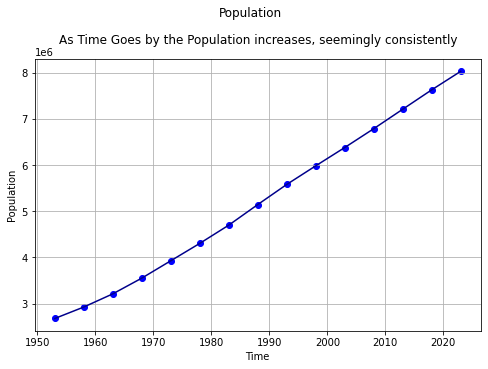

In [44]:
# Has the population risen over time?
plt.figure(1,figsize=(8,5))
plt.plot(World2['MidPeriod'], 
        World2['PopTotal'],
         color = 'darkblue')
plt.scatter(World2['MidPeriod'], World2['PopTotal'],c='blue',)
plt.xlabel('Time')
plt.ylabel('Population')
plt.suptitle('Population',y=1.025)
plt.title('As Time Goes by the Population increases, seemingly consistently',pad=15);
plt.grid();

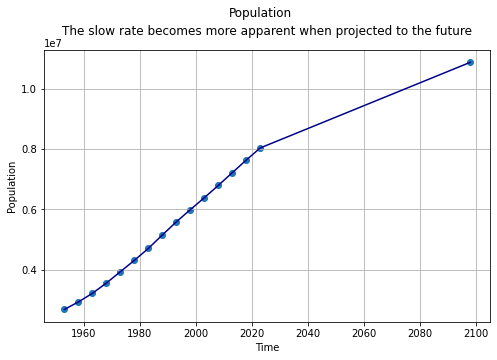

In [45]:
# Population to predicted date (2098)
plt.figure(figsize=(8,5))
plt.plot(World['MidPeriod'], 
        World['PopTotal'],
         color = 'darkblue')
plt.scatter(World['MidPeriod'], World['PopTotal']) 
    
plt.xlabel('Time')
plt.ylabel('Population')
plt.suptitle('Population',y=1)
plt.title('The slow rate becomes more apparent when projected to the future', 
          pad=15)
plt.grid();

Despite the climb in population, the rate of that growth has slown


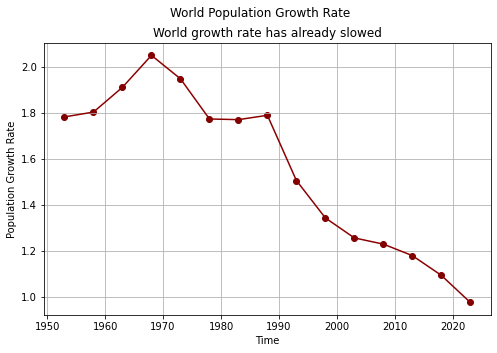

In [46]:
# Has the rise been consistent? (has it continuously increased without slowing?)
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(World2['MidPeriod'], World2['GrowthRate'], color = 'darkred')
ax.scatter(World2['MidPeriod'], 
           World2['GrowthRate'], color = 'maroon')

ax.set(xlabel='Time', ylabel='Population Growth Rate',
       title='World growth rate has already slowed')
plt.suptitle('World Population Growth Rate')
ax.grid();
print('Despite the climb in population, the rate of that growth has slown')

Death Rate drops until picking up around 2020 and predicted to continue to rise


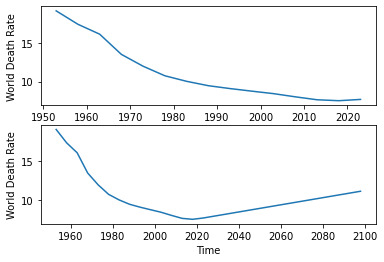

In [47]:
# Has population been affected by external forces?
plt.subplot(2,1,1)

plt.plot(World2['MidPeriod'], 
        World2['Crude Death Rate'])
plt.xlabel('Time')
plt.ylabel('World Death Rate')

plt.subplot(2,1,2)

plt.plot(World['MidPeriod'], 
        World['Crude Death Rate'])
plt.xlabel('Time')
plt.ylabel('World Death Rate')
;
print('Death Rate drops until picking up around 2020 and predicted to continue to rise')

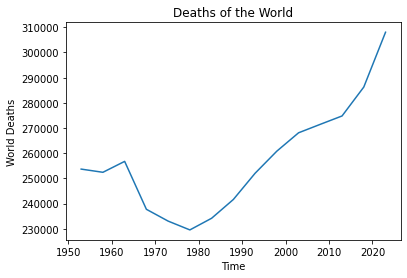

In [48]:
fig, ax = plt.subplots()
ax.plot(World2['MidPeriod'], 
        World2['Deaths'])

ax.set(xlabel='Time', ylabel='World Deaths',
       title='Deaths of the World');

In [49]:
# I became curious about the difference between the death rates
print(np.diff(World['Crude Death Rate']))
list(World['Crude Death Rate'])

[-1.728 -1.273 -2.604 -1.525 -1.228 -0.714 -0.563 -0.372 -0.33  -0.322
 -0.409 -0.378 -0.121  0.165  3.446]


[19.113,
 17.385,
 16.112000000000002,
 13.508,
 11.982999999999999,
 10.755,
 10.041,
 9.478,
 9.106,
 8.776,
 8.454,
 8.045,
 7.667000000000001,
 7.546,
 7.711,
 11.157]

In [50]:
# and deaths between the periods
print(np.diff(World['Deaths']))
list(World['Deaths'])

[ -1270.533   4334.556 -19021.047  -4685.324  -3499.463   4627.57
   7452.19   10408.041   8776.498   7290.617   3362.6     3319.014
  11478.534  21752.821 298019.738]


[253702.97,
 252432.437,
 256766.99300000002,
 237745.94600000003,
 233060.622,
 229561.15899999999,
 234188.729,
 241640.919,
 252048.96,
 260825.458,
 268116.075,
 271478.675,
 274797.689,
 286276.223,
 308029.044,
 606048.782]

''

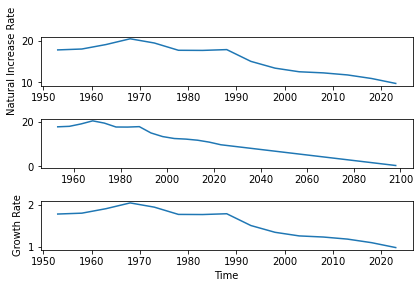

In [51]:
# Population natural increase rate
plt.subplot(3,1,1)
plt.plot(World2['MidPeriod'], 
        World2['Natural Increase Rate'])
plt.ylabel('Natural Increase Rate')
plt.subplot(3,1,3)
plt.plot(World2['MidPeriod'], 
        World2['GrowthRate'])
plt.xlabel('Time')
plt.ylabel('Growth Rate')
plt.subplot(3,1,2)
plt.plot(World['MidPeriod'], 
        World['Natural Increase Rate'])
plt.tight_layout()
;

## Fertility:

* Is the global fertility rate in decline?
* Is fertility better in certain regions?
* Are there any regions not showing signs of slowing?
* Is there a point of origin for the drop?

Globally the fertility rate has been consistently in decline since around 1965


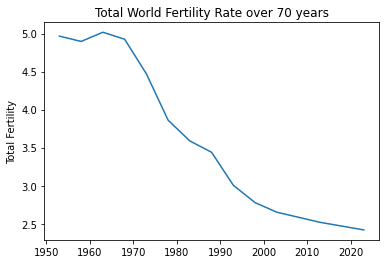

In [52]:
# Is the global fertility rate in decline?
plt.plot(World2['MidPeriod'], 
        World2['Total Fertility'])
plt.ylabel('Total Fertility')
plt.title('Total World Fertility Rate over 70 years')
print('Globally the fertility rate has been consistently in decline since around 1965');

In [53]:
# Is fertility better in certain regions?
# China, India, United States, Indonesia, Pakistan, 
# Brazil, Nigeria, Bangladesh, Russia and Mexico 
# are countries at the most risk of overpopulation
China = Total_Population_Period_Indicators[Total_Population_Period_Indicators.Location == 'China']
India = Total_Population_Period_Indicators[Total_Population_Period_Indicators.Location == 'India']
USA = Total_Population_Period_Indicators[Total_Population_Period_Indicators.Location == 'United States of America']
Indonesia = Total_Population_Period_Indicators[Total_Population_Period_Indicators.Location == 'Indonesia']
Pakistan = Total_Population_Period_Indicators[Total_Population_Period_Indicators.Location == 'Pakistan']
Brazil = Total_Population_Period_Indicators[Total_Population_Period_Indicators.Location == 'Brazil']
Nigeria = Total_Population_Period_Indicators[Total_Population_Period_Indicators.Location == 'Nigeria']
Bangladesh = Total_Population_Period_Indicators[Total_Population_Period_Indicators.Location == 'Bangladesh']
Russia = Total_Population_Period_Indicators[Total_Population_Period_Indicators.Location == 'Russian Federation']
Mexico = Total_Population_Period_Indicators[Total_Population_Period_Indicators.Location == 'Mexico']

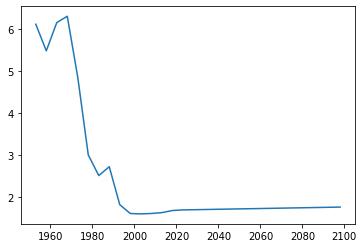

In [54]:
plt.plot(China['MidPeriod'], 
        China['Total Fertility']);

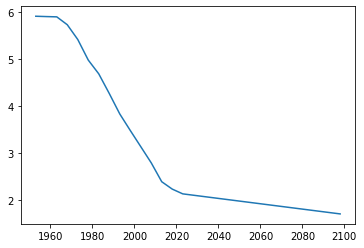

In [55]:
plt.plot(India['MidPeriod'], 
        India['Total Fertility']);

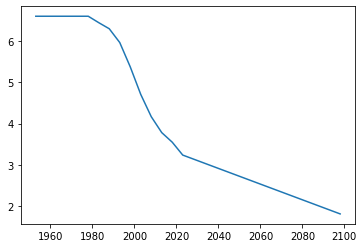

In [56]:
plt.plot(Pakistan['MidPeriod'], 
        Pakistan['Total Fertility']);

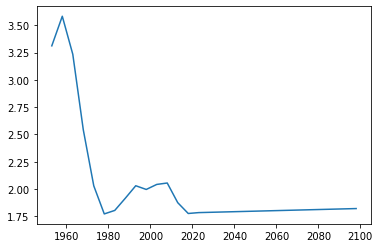

In [57]:
plt.plot(USA['MidPeriod'], 
        USA['Total Fertility']);

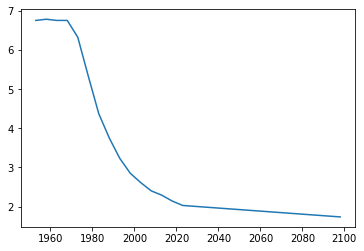

In [58]:
plt.plot(Mexico['MidPeriod'], 
        Mexico['Total Fertility']);

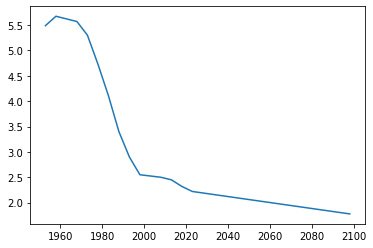

In [59]:
plt.plot(Indonesia['MidPeriod'], 
        Indonesia['Total Fertility']);

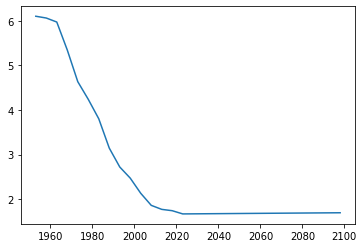

In [60]:
plt.plot(Brazil['MidPeriod'], 
        Brazil['Total Fertility']);

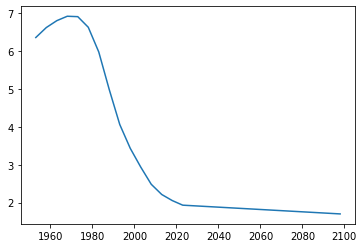

In [61]:
plt.plot(Bangladesh['MidPeriod'], 
        Bangladesh['Total Fertility']);

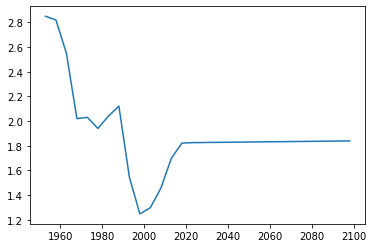

In [62]:
plt.plot(Russia['MidPeriod'], 
        Russia['Total Fertility']);

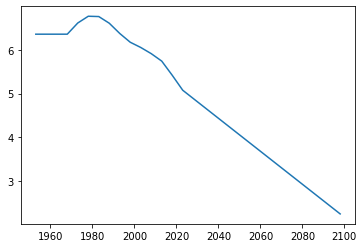

In [63]:
plt.plot(Nigeria['MidPeriod'], 
        Nigeria['Total Fertility']);

In [64]:
# Argentina, Canada, Chad, Mongolia, Papa New Guinea, and Australia
# are countries that have lower population 
Argentina = Total_Population_Period_Indicators[Total_Population_Period_Indicators.Location == 'Argentina']
Canada = Total_Population_Period_Indicators[Total_Population_Period_Indicators.Location == 'Canada']
Chad = Total_Population_Period_Indicators[Total_Population_Period_Indicators.Location == 'Chad']
Mongolia = Total_Population_Period_Indicators[Total_Population_Period_Indicators.Location == 'Mongolia']
PNG = Total_Population_Period_Indicators[Total_Population_Period_Indicators.Location == 'Papua New Guinea']
Australia = Total_Population_Period_Indicators[Total_Population_Period_Indicators.Location == 'Australia']

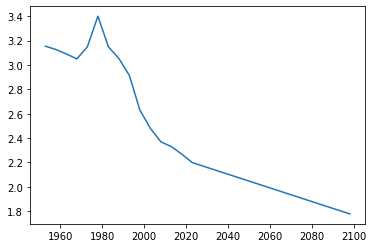

In [65]:
plt.plot(Argentina['MidPeriod'],
         Argentina['Total Fertility']);

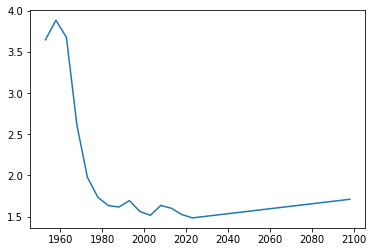

In [66]:
plt.plot(Canada['MidPeriod'],
         Canada['Total Fertility']);

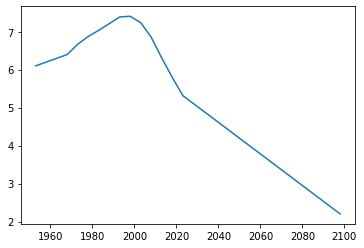

In [67]:
plt.plot(Chad['MidPeriod'],
         Chad['Total Fertility']);

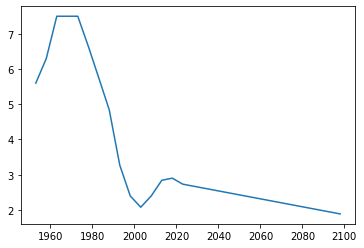

In [68]:
plt.plot(Mongolia['MidPeriod'],
         Mongolia['Total Fertility']);

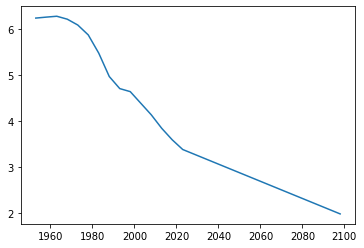

In [69]:
plt.plot(PNG['MidPeriod'],
         PNG['Total Fertility']);

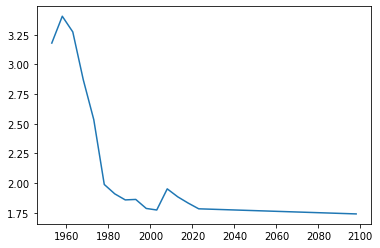

In [70]:
plt.plot(Australia['MidPeriod'],
         Australia['Total Fertility']);

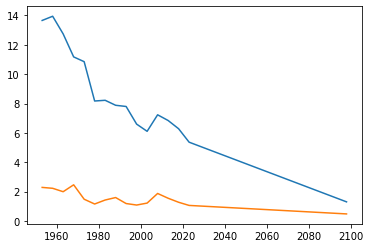

In [71]:
# Earlier I had concluded that the Natural Increase Rate and Growth Rate took similar shapes
# I wanted to reaffirm that
plt.plot(Australia['MidPeriod'],
         Australia['Natural Increase Rate'])
plt.plot(Australia['MidPeriod'],
         Australia['GrowthRate']);

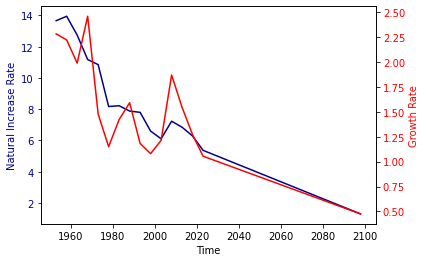

In [72]:
dates = Australia['MidPeriod']
Fig,ax = plt.subplots()

c1 = 'darkblue'
ax.plot(dates, Australia['Natural Increase Rate'], color = c1)

ax.set_xlabel('Time') 
ax.set_ylabel('Natural Increase Rate', color = c1)  
ax.tick_params(axis ='y', labelcolor = c1)

ax2 = ax.twinx()
c2 = 'red'
ax2.set_ylabel('Growth Rate', color = c2) 
ax2.plot(dates, Australia['GrowthRate'], color = c2) 
ax2.tick_params(axis ='y', labelcolor = c2)

In [73]:
# Are there any regions not showing signs of slowing?
# To analyze this I decided to create subsets of the continents
Asia = Total_Population_Period_Indicators[Total_Population_Period_Indicators.Location == 'Asia']
Africa = Total_Population_Period_Indicators[Total_Population_Period_Indicators.Location == 'Africa']
Oceania = Total_Population_Period_Indicators[Total_Population_Period_Indicators.Location == 'Oceania']
NAmerica = Total_Population_Period_Indicators[Total_Population_Period_Indicators.Location == 'Northern America']
SAmerica = Total_Population_Period_Indicators[Total_Population_Period_Indicators.Location == 'South America']
Europe = Total_Population_Period_Indicators[Total_Population_Period_Indicators.Location == 'Europe']


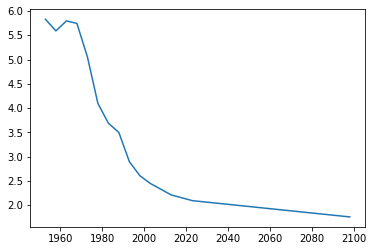

In [74]:
plt.plot(Asia['MidPeriod'],
         Asia['Total Fertility']);

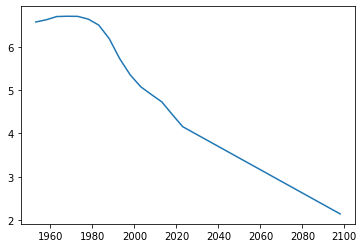

In [75]:
plt.plot(Africa['MidPeriod'],
         Africa['Total Fertility']);

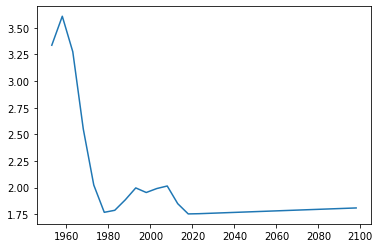

In [76]:
plt.plot(NAmerica['MidPeriod'],
         NAmerica['Total Fertility']);

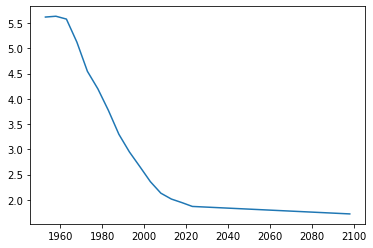

In [77]:
plt.plot(SAmerica['MidPeriod'],
         SAmerica['Total Fertility']);

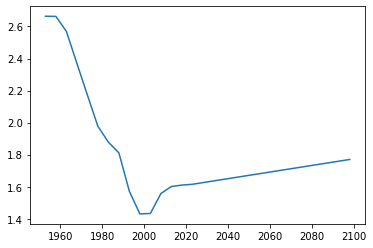

In [78]:
plt.plot(Europe['MidPeriod'],
         Europe['Total Fertility']);

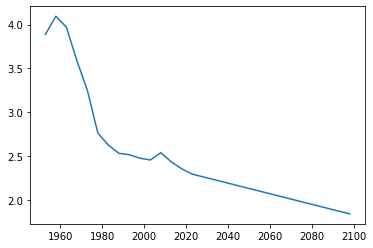

In [79]:
plt.plot(Oceania['MidPeriod'],
         Oceania['Total Fertility']);

There is a drop in all regions, but some are effected much more than others.

North America and Europe are predicted to recover

In [80]:
# Is there a point of origin for the drop?
print('All the above charts, with exception of Africa, show a drop between the 60s and 80s')
print('It should be mentioned that charts created in another notebook suggests the consistent drop begins around the 1990s')

All the above charts, with exception of Africa, show a drop between the 60s and 80s
It should be mentioned that charts created in another notebook suggests the consistent drop begins around the 1990s


## Births:

* Are the number of children born annually on a decline?
* Are there areas not effected by this?
* Is there a point of origin of the decline?

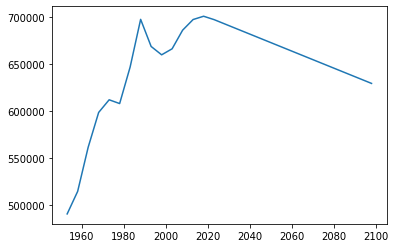

In [81]:
# Are the number of children born annually on a decline?
plt.plot(World['MidPeriod'],
         World['Births']);

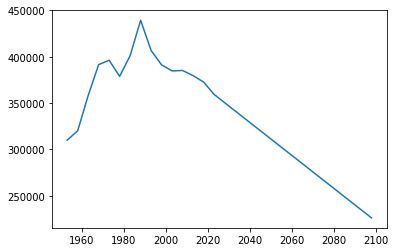

In [82]:
# Are there areas not effected by this?
plt.plot(Asia['MidPeriod'],
         Asia['Births']);

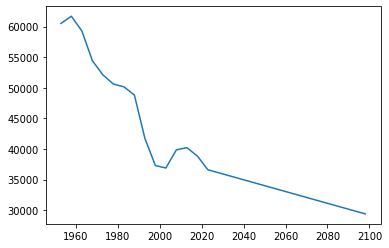

In [83]:
plt.plot(Europe['MidPeriod'],
         Europe['Births']);

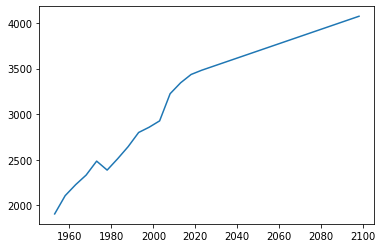

In [84]:
plt.plot(Oceania['MidPeriod'],
         Oceania['Births']);

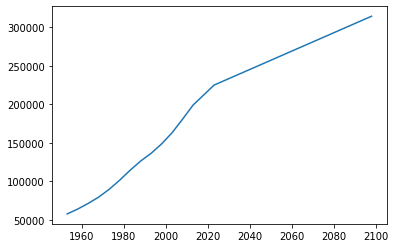

In [85]:
plt.plot(Africa['MidPeriod'],
         Africa['Births']);

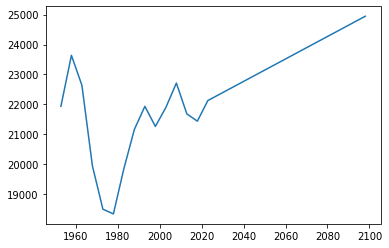

In [86]:
plt.plot(NAmerica['MidPeriod'],
         NAmerica['Births']);

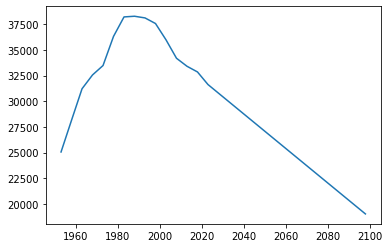

In [87]:
plt.plot(SAmerica['MidPeriod'],
         SAmerica['Births']);

North America, Africa, and Oceania are not effected.

In [88]:
# Is there a point of origin of the decline?
print('There is no obvious point of origin for the decline')

There is no obvious point of origin for the decline


# Playground:

After looking into my considerations, I changed my focus to the blog posts. Essentially going back and forth and calling images as needed. What follows is a series of code for the charts needed for my summation. 

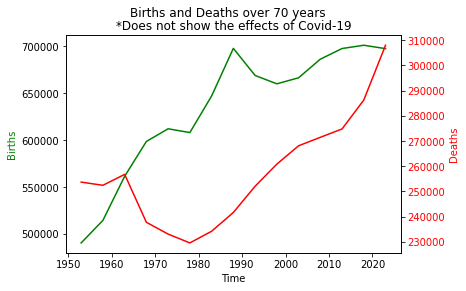

In [89]:
# Wanted to compare births and deaths
# Ultimately decided that the twin would give the wrong interpretation

dates = World2['MidPeriod']
Fig,ax = plt.subplots()

ax.plot(dates, World2['Births'], color = 'green')

ax.set_xlabel('Time') 
ax.set_ylabel('Births', color = 'green')  
ax.tick_params(axis ='y')

ax2 = ax.twinx()

ax2.set_ylabel('Deaths', color = 'red') 
ax2.plot(dates, World2['Deaths'], color = 'red') 
ax2.tick_params(axis ='y', labelcolor = 'red')
plt.title('*Does not show the effects of Covid-19')
plt.suptitle('Births and Deaths over 70 years');

''

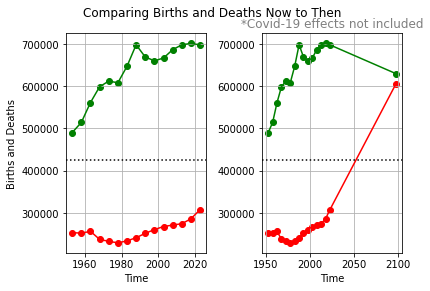

In [103]:
# Population Births and deaths now to the future
plt.subplot(1,2,1)

plt.plot(dates, World2['Deaths'], color = 'red')
plt.plot(dates, World2['Births'], color = 'green')
plt.scatter(dates, World2['Deaths'], color = 'red')
plt.scatter(dates, World2['Births'], color = 'green')

plt.ylabel('Births and Deaths')
plt.xlabel('Time')
plt.grid()
plt.axhline(y= 425000, color = 'black', ls = ':')
plt.subplot(1,2,2)

plt.plot(World['MidPeriod'], World['Deaths'], color = 'red')
plt.plot(World['MidPeriod'], World['Births'], color = 'green')
plt.scatter(World['MidPeriod'], World['Deaths'], color = 'red')
plt.scatter(World['MidPeriod'], World['Births'], color = 'green')
plt.xlabel('Time')
plt.grid()

plt.suptitle('Comparing Births and Deaths Now to Then', y=1)
plt.title('*Covid-19 effects not included',  color = 'grey')

plt.axhline(y= 425000, color = 'black', ls = ':')
plt.tight_layout()
;

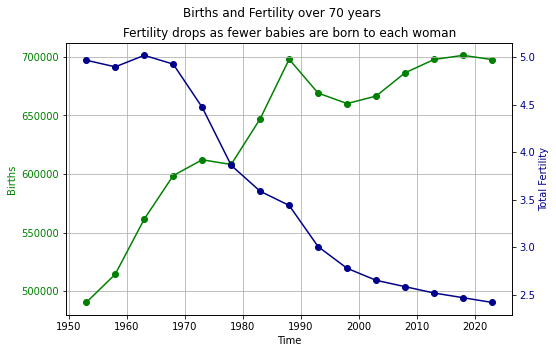

In [107]:
# Total Fertility and Births
Fig,ax = plt.subplots(figsize = (8,5))

ax.plot(World2['MidPeriod'], World2['Births'], color = 'green')
ax.scatter(World2['MidPeriod'], World2['Births'], color = 'green')

ax.set_xlabel('Time') 
ax.set_ylabel('Births', color = 'green')  
ax.tick_params(axis ='y', labelcolor = 'green')

ax2 = ax.twinx()

ax2.plot(World2['MidPeriod'], World2['Total Fertility'], color = 'darkblue')
ax2.scatter(World2['MidPeriod'], World2['Total Fertility'], color = 'darkblue')

ax2.set_ylabel('Total Fertility', color = 'darkblue')
ax2.tick_params(axis ='y', labelcolor = 'darkblue')

ax.grid()
plt.title('Fertility drops as fewer babies are born to each woman')
plt.suptitle('Births and Fertility over 70 years');

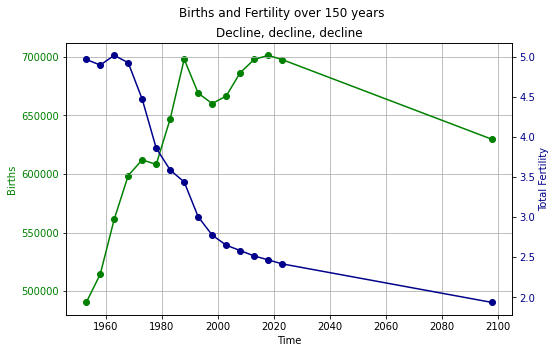

In [108]:
Fig,ax = plt.subplots(figsize = (8,5))

ax.plot(World['MidPeriod'], World['Births'], color = 'green')
ax.scatter(World['MidPeriod'], World['Births'], color = 'green')

ax.set_xlabel('Time') 
ax.set_ylabel('Births', color = 'green')  
ax.tick_params(axis ='y', labelcolor = 'green')

ax2 = ax.twinx()

ax2.plot(World['MidPeriod'], World['Total Fertility'], color = 'darkblue')
ax2.scatter(World['MidPeriod'], World['Total Fertility'], color = 'darkblue')

ax2.set_ylabel('Total Fertility', color = 'darkblue') 
ax2.tick_params(axis ='y', labelcolor = 'darkblue')

ax.grid()
plt.title('Decline, decline, decline')
plt.suptitle('Births and Fertility over 150 years');

# Resources: 
 * [Data](https://population.un.org/wpp/Download/Standard/CSV/)
 * [World History Timeline 1](https://www.wdl.org/en/sets/world-history/timeline/#88)
 * [World History Timeline Disasters](https://timelines.ws/subjects/Disasters.HTML)
 * [World Population Information](https://www.prb.org/humanpopulation/#:~:text=The%20rate%20of%20natural%20increase%20is%20the%20difference%20between%20birth,this%20rate%20into%20a%20percentage.)
 * Blog post resources are listed in post
  * [Google](https://www.google.com)
    * [Wikipedia](https://www.wikipedia.com)



